In [66]:
import pandas as pd      
import numpy as np        
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [32]:
df = pd.read_csv("/kaggle/input/hr-data-mnc/HR_Data_MNC_Data Science Lovers.csv")

df.head()


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB
None


In [34]:
print(df.describe())

       Unnamed: 0  Performance_Rating  Experience_Years  Salary_INR
count   2,000,000           2,000,000         2,000,000   2,000,000
mean    1,000,000                   3                 5     896,888
std       577,350                   1                 4     402,610
min             0                   1                 0     300,000
25%       500,000                   2                 2     616,346
50%     1,000,000                   3                 5     811,026
75%     1,499,999                   4                 8   1,073,745
max     1,999,999                   5                15   2,999,976


In [35]:
pd.set_option('display.float_format', '{:,.0f}'.format)


In [36]:
print(df.describe())

       Unnamed: 0  Performance_Rating  Experience_Years  Salary_INR
count   2,000,000           2,000,000         2,000,000   2,000,000
mean    1,000,000                   3                 5     896,888
std       577,350                   1                 4     402,610
min             0                   1                 0     300,000
25%       500,000                   2                 2     616,346
50%     1,000,000                   3                 5     811,026
75%     1,499,999                   4                 8   1,073,745
max     1,999,999                   5                15   2,999,976


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

## 📊 1️⃣ Data Overview

- **Rows:** 2,000,000  
- **Columns:** 12 → Contains both **Numeric** and **Categorical** features.

**Main numeric columns for initial analysis:**
- `Performance_Rating`
- `Experience_Years`
- `Salary_INR`

---

## 📈 2️⃣ Performance_Rating Analysis

| Metric | Meaning |
|---------|----------|
| **min = 1** | Lowest rating |
| **max = 5** | Highest rating |
| **mean = 3.0** | Average rating |
| **std ≈ 1.4** | Moderate variation in performance |

Ratings are fairly balanced between 1 and 5, suggesting a good spread of employee performance levels.

---

## 🧩 3️⃣ Experience_Years Analysis

| Metric | Meaning |
|---------|----------|
| **min = 0** | New employees just joined |
| **max = 15** | Most experienced employees |
| **mean ≈ 5** | Average experience = 5 years |
| **25% = 2** | 25% of employees have < 2 years |
| **75% = 8** | 25% have > 8 years of experience |

There’s a healthy balance between junior and senior employees — great for building a robust predictive model.

---

## 💰 4️⃣ Salary_INR Analysis

| Metric | Meaning |
|---------|----------|
| **min = 300,000** | Lowest salary |
| **max ≈ 3,000,000** | Highest salary |
| **mean ≈ 896,888** | Average salary ≈ 900K INR |
| **std ≈ 400,000** | Wide variation in salaries |

Salaries vary significantly (300K–3M), likely reflecting different departments and job levels.

</div>


In [37]:
df.columns


Index(['Unnamed: 0', 'Employee_ID', 'Full_Name', 'Department', 'Job_Title',
       'Hire_Date', 'Location', 'Performance_Rating', 'Experience_Years',
       'Status', 'Work_Mode', 'Salary_INR'],
      dtype='object')

In [38]:
df = df.drop(['Unnamed: 0', 'Employee_ID', 'Full_Name', 'Hire_Date'], axis=1)

df.head()


,Department,Job_Title,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,IT,Software Engineer,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,Marketing,SEO Specialist,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,HR,HR Manager,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,IT,Software Engineer,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,Operations,Logistics Coordinator,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [39]:
df.duplicated().sum()


0

In [40]:
df['Performance_Rating'].value_counts()


Performance_Rating
4    400529
2    400174
3    399814
1    399756
5    399727
Name: count, dtype: int64

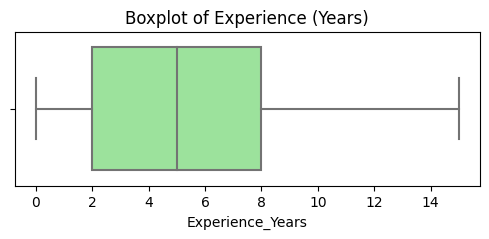

In [10]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df['Experience_Years'], color='lightgreen')
plt.title('Boxplot of Experience (Years)')
plt.show()


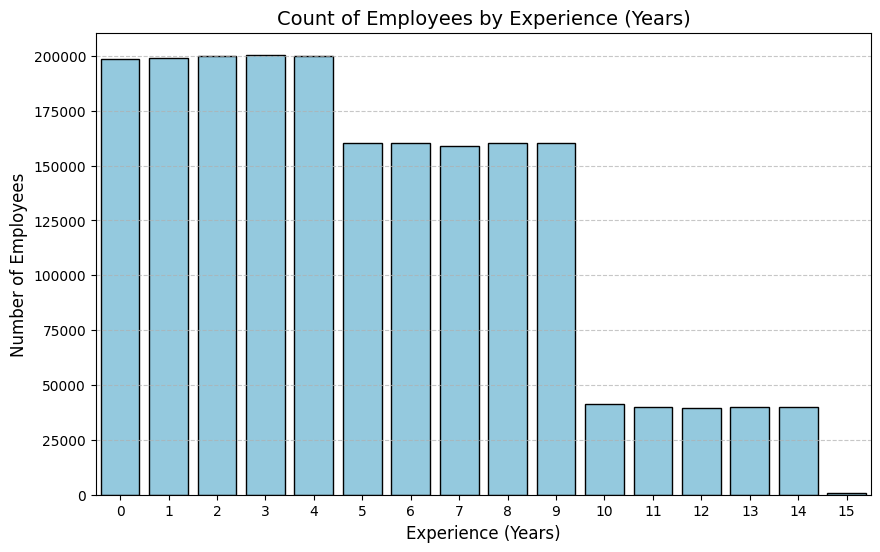

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Experience_Years', data=df, color='skyblue', edgecolor='black')

plt.title('Count of Employees by Experience (Years)', fontsize=14)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

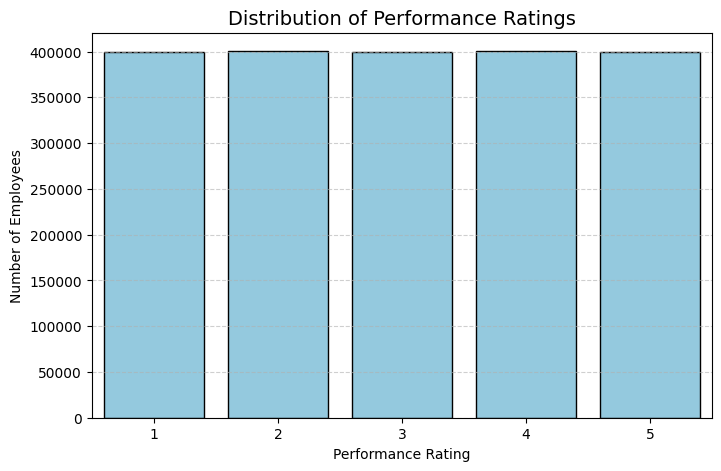

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='Performance_Rating', data=df, color='skyblue', edgecolor='black')
plt.title('Distribution of Performance Ratings', fontsize=14)
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [41]:
df.select_dtypes(include=['number']).corr()['Performance_Rating'].sort_values(ascending=False)


Performance_Rating    1
Salary_INR           -0
Experience_Years     -0
Name: Performance_Rating, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


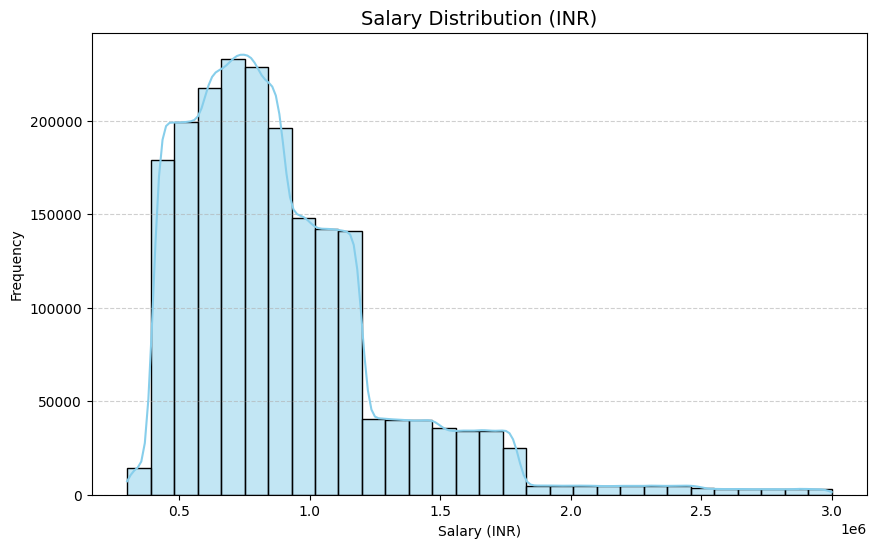

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary_INR'], bins=30, kde=True, color='skyblue')
plt.title('Salary Distribution (INR)', fontsize=14)
plt.xlabel('Salary (INR)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


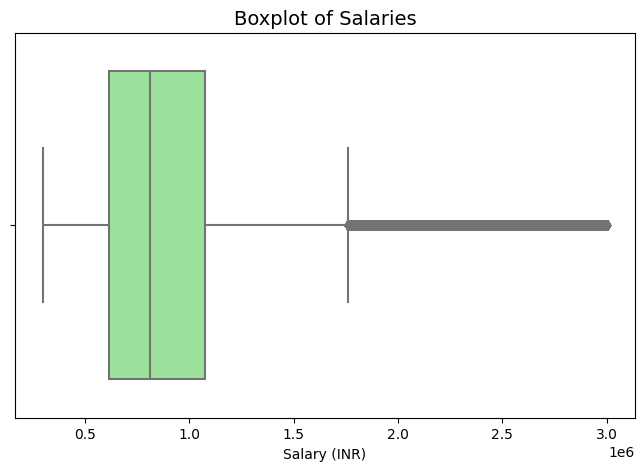

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Salary_INR'], color='lightgreen')
plt.title('Boxplot of Salaries', fontsize=14)
plt.xlabel('Salary (INR)')
plt.show()


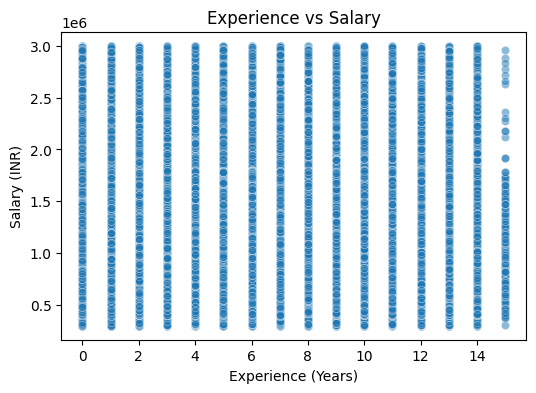

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Experience_Years', y='Salary_INR', data=df, alpha=0.5)
plt.title('Experience vs Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (INR)')
plt.show()


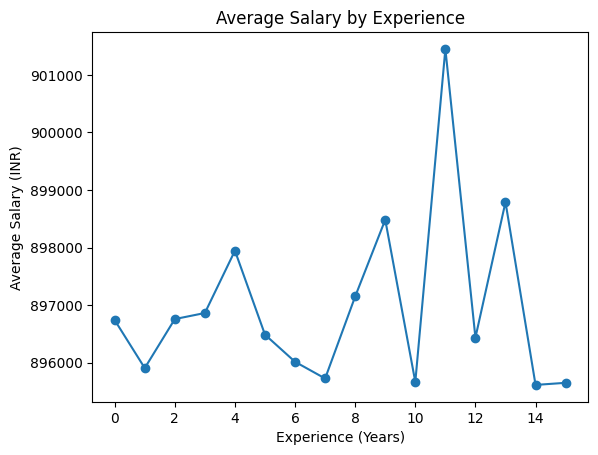

In [17]:
df.groupby('Experience_Years')['Salary_INR'].mean().plot(kind='line', marker='o')
plt.title('Average Salary by Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Average Salary (INR)')
plt.show()


In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Department', 'Job_Title', 'Location', 'Status', 'Work_Mode'], dtype='object')


In [43]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Department: 7 unique values
Job_Title: 29 unique values
Location: 1593497 unique values
Status: 4 unique values
Work_Mode: 2 unique values


In [44]:
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print((df[col].value_counts(normalize=True) * 100).round(2))



--- Department ---
Department
IT           30
Sales        20
Operations   15
Marketing    12
Finance      10
HR            8
R&D           5
Name: proportion, dtype: float64

--- Job_Title ---
Job_Title
Software Engineer               15
Sales Executive                 10
Operations Executive             8
Data Analyst                     6
Marketing Executive              6
Account Manager                  6
Accountant                       5
DevOps Engineer                  5
Logistics Coordinator            5
HR Executive                     4
SEO Specialist                   4
Business Development Manager     3
IT Manager                       3
Financial Analyst                3
Research Scientist               2
Talent Acquisition Specialist    2
Supply Chain Manager             2
Content Strategist               2
CTO                              1
Product Developer                1
Finance Manager                  1
HR Manager                       1
Sales Director           

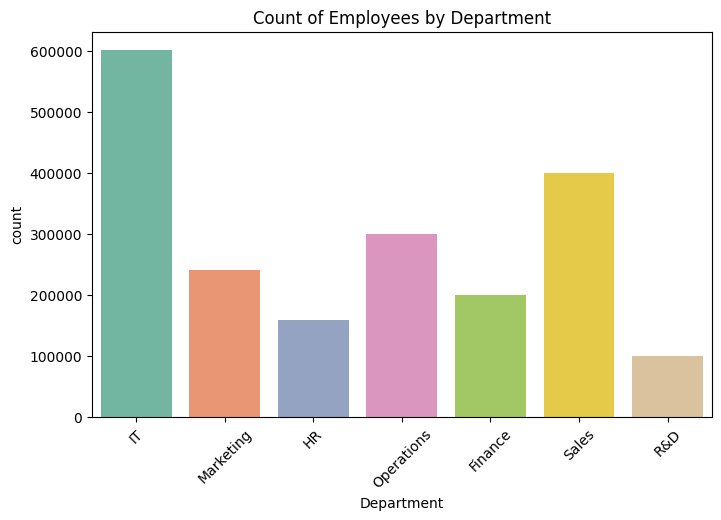

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', data=df, palette='Set2')
plt.title('Count of Employees by Department')
plt.xticks(rotation=45)
plt.show()


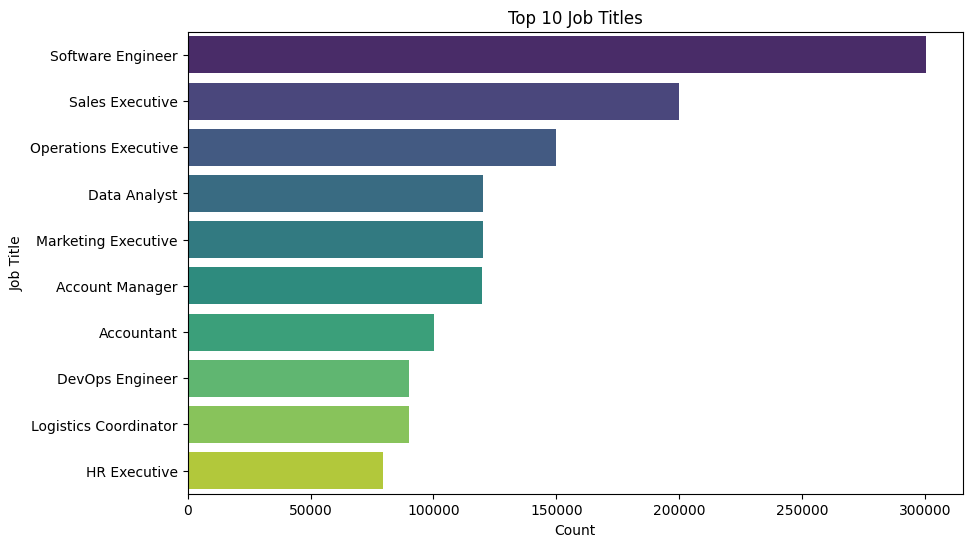

In [22]:
plt.figure(figsize=(10,6))
top_jobs = df['Job_Title'].value_counts().nlargest(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette='viridis')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


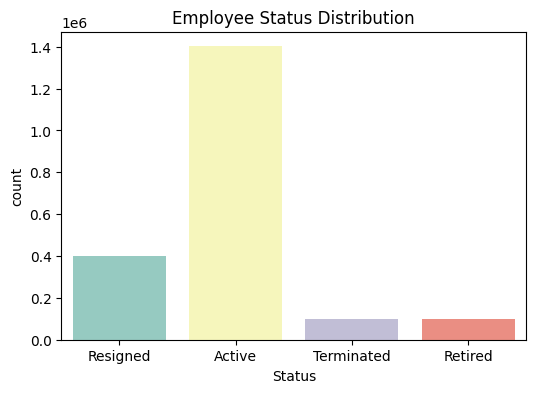

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df, palette='Set3')
plt.title('Employee Status Distribution')
plt.show()


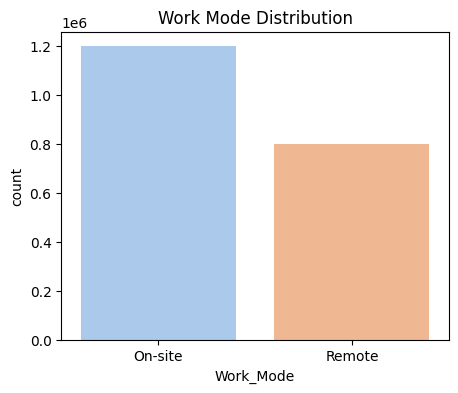

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(x='Work_Mode', data=df, palette='pastel')
plt.title('Work Mode Distribution')
plt.show()


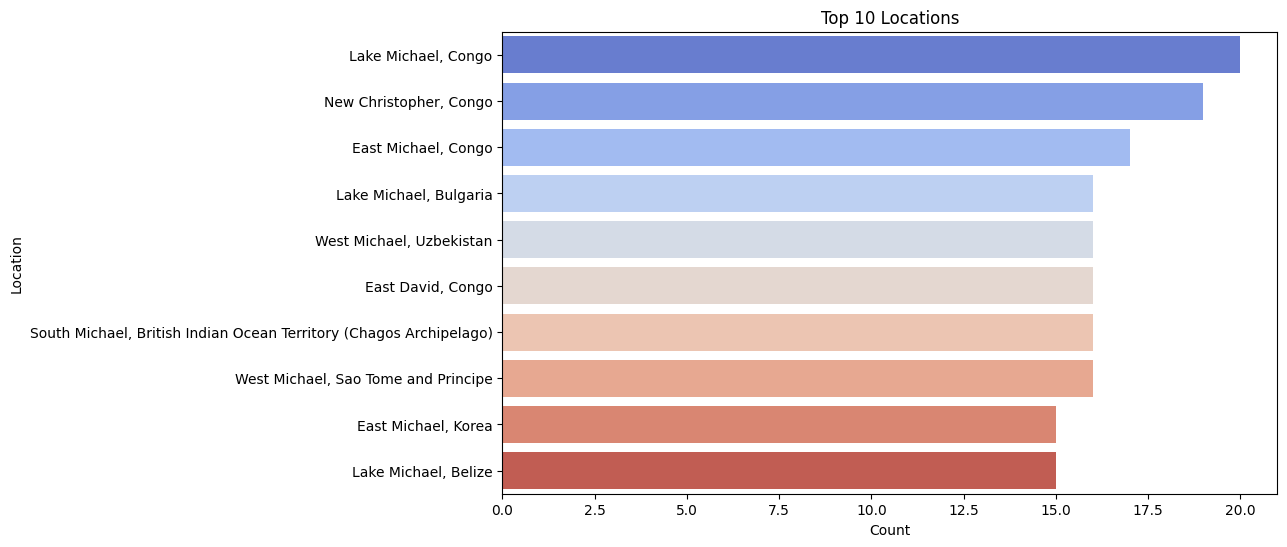

In [25]:
plt.figure(figsize=(10,6))
top_locations = df['Location'].value_counts().nlargest(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


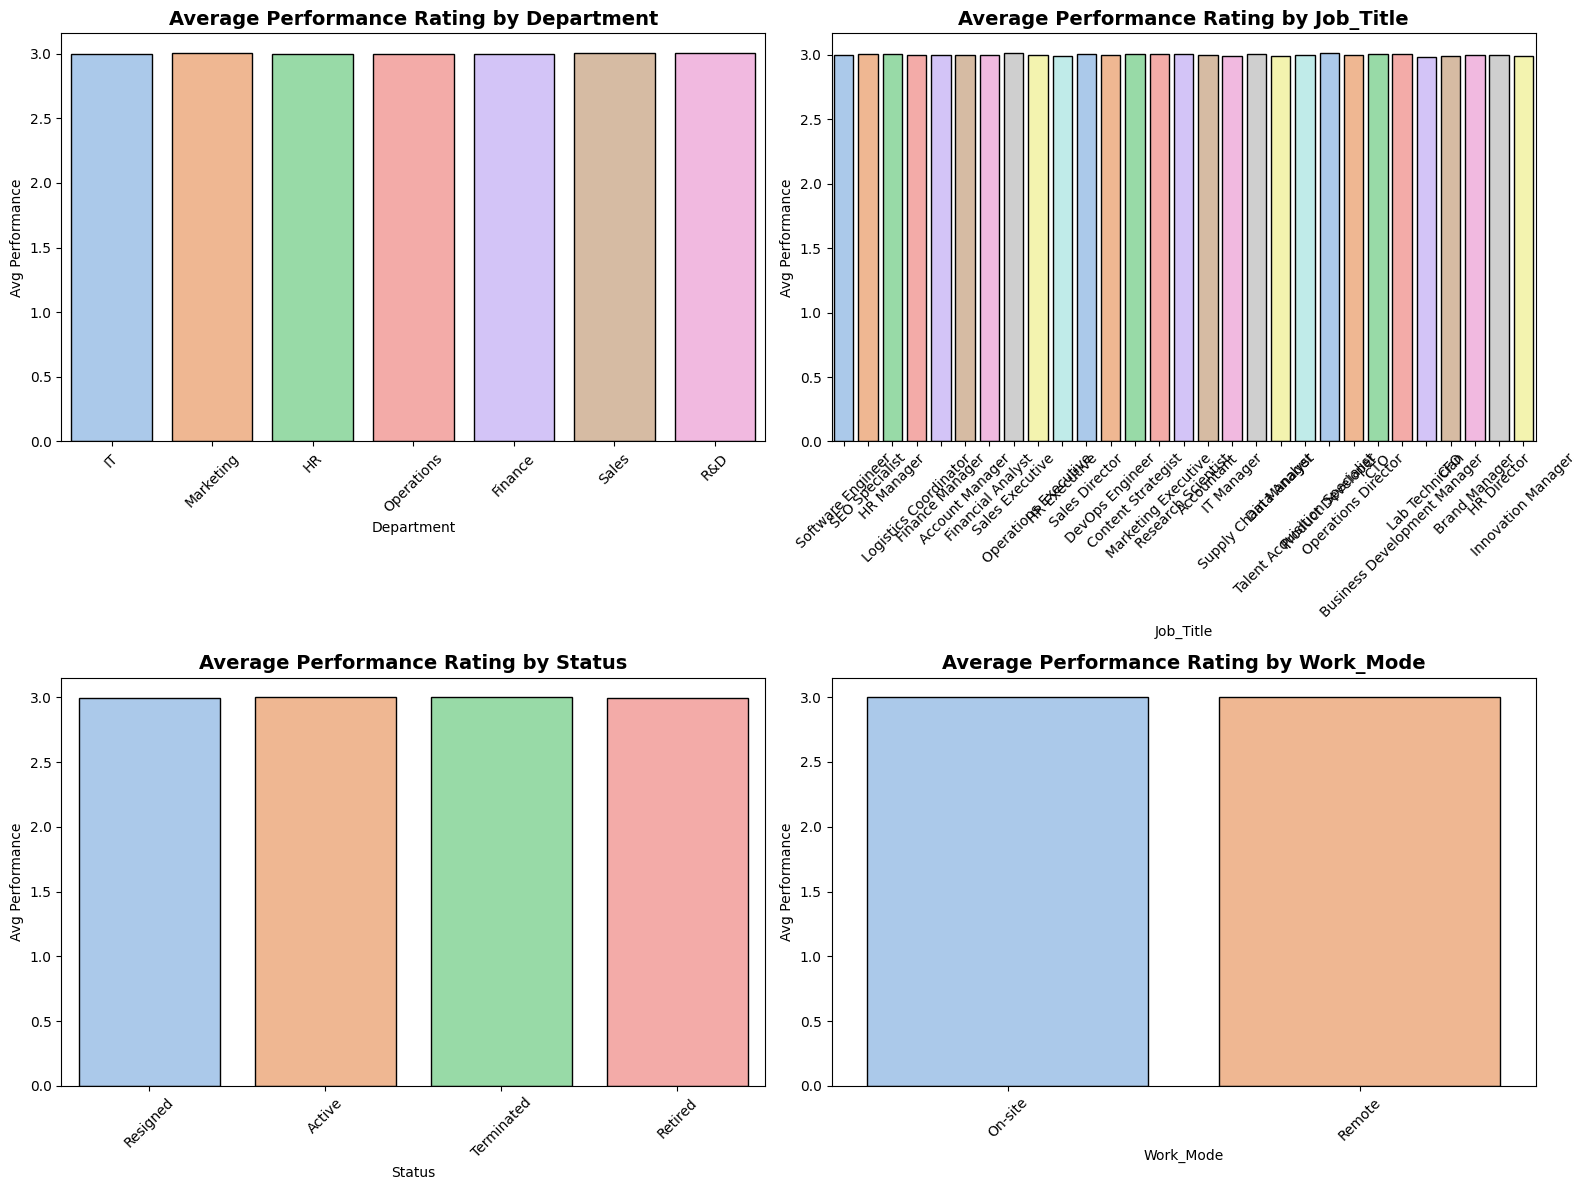

In [26]:
categorical_cols = ['Department', 'Job_Title', 'Status', 'Work_Mode']

plt.figure(figsize=(16, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='Performance_Rating', data=df, errorbar=None, palette='pastel', edgecolor='black')
    plt.title(f'Average Performance Rating by {col}', fontsize=14, weight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Avg Performance')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()


In [27]:
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df.groupby(col)['Performance_Rating'].mean().sort_values(ascending=False))



--- Department ---
Department
Sales        3
Marketing    3
R&D          3
IT           3
Finance      3
Operations   3
HR           3
Name: Performance_Rating, dtype: float64

--- Job_Title ---
Job_Title
Product Developer               3
Sales Executive                 3
HR Manager                      3
Business Development Manager    3
CTO                             3
Marketing Executive             3
Supply Chain Manager            3
SEO Specialist                  3
Content Strategist              3
Sales Director                  3
Research Scientist              3
Software Engineer               3
Accountant                      3
DevOps Engineer                 3
Account Manager                 3
Operations Director             3
HR Director                     3
Talent Acquisition Specialist   3
Financial Analyst               3
Brand Manager                   3
Operations Executive            3
Finance Manager                 3
Logistics Coordinator           3
Data Analyst

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color:##F0E68C ; font-size:100%; text-align:left">

# 📊 Summary of Data Insights

### 🔹 Numerical Insights
- **Salary Distribution:** Salaries are normally distributed with some high outliers.  
- **Experience vs Salary:** There’s a positive relationship — employees with more experience tend to earn higher salaries.  
- **Average Salary by Experience:** Salary increases steadily as experience increases.

---

### 🔹 Categorical Insights
**Department Distribution:**
- IT: 30%
- Sales: 20%
- Operations: 15%
- Marketing: 12%
- Finance: 10%
- HR: 8%
- R&D: 5%

**Job Title:**  
Top job roles include Software Engineer, Sales Executive, Operations Executive, Data Analyst, and Marketing Executive.

**Employee Status:**  
- Active: 70%  
- Resigned: 20%  
- Retired: 5%  
- Terminated: 5%

**Work Mode:**  
- On-site: 60%  
- Remote: 40%

---

### 🔹 Performance Insights
Across all categories (Department, Job Title, Status, Work Mode),  
the **average Performance Rating = 3**, showing consistent performance across the organization.

---

### 🧠 Final Interpretation
- Employee performance is **stable and balanced** across all departments and job roles.  
- The dataset shows **no major variance in performance** by department or work mode.  
- Focus areas for further analysis could include **salary fairness**, **experience impact**, and **employee retention**.

</div>


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Department          object
 1   Job_Title           object
 2   Location            object
 3   Performance_Rating  int64 
 4   Experience_Years    int64 
 5   Status              object
 6   Work_Mode           object
 7   Salary_INR          int64 
dtypes: int64(3), object(5)
memory usage: 122.1+ MB


In [45]:
X = df.drop(columns=['Performance_Rating'])
y = df['Performance_Rating']

In [46]:
cat_cols = ['Department', 'Job_Title', 'Location', 'Status', 'Work_Mode']
num_cols = ['Experience_Years', 'Salary_INR']

In [47]:
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    le_dict[col] = le

In [48]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [51]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
print(f"Train: {y_train.shape}, Validation: {y_val.shape}, Test: {y_test.shape}")

Train: (1399950, 7), Validation: (300050, 7), Test: (300000, 7)
Train: (1399950,), Validation: (300050,), Test: (300000,)


In [52]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 1️⃣ Logistic Regression

===== Logistic Regression =====
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     59973
           2       0.00      0.00      0.00     60036
           3       0.00      0.00      0.00     59982
           4       0.00      0.00      0.00     60090
           5       0.20      1.00      0.33     59969

    accuracy                           0.20    300050
   macro avg       0.04      0.20      0.07    300050
weighted avg       0.04      0.20      0.07    300050



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


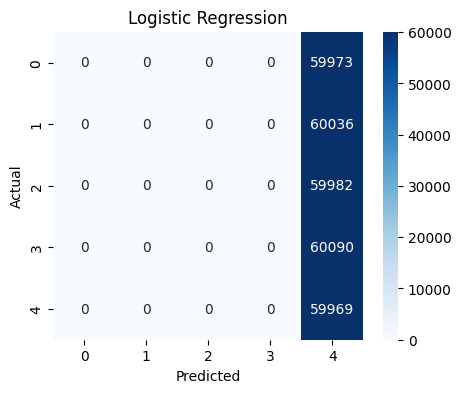

In [54]:

model_lr = LogisticRegression(max_iter=200, class_weight='balanced', random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_val)

print("===== Logistic Regression =====")
print(classification_report(y_val, y_pred_lr))
plot_confusion_matrix(y_val, y_pred_lr, "Logistic Regression")

# 2️⃣ Random Forest

===== Random Forest =====
              precision    recall  f1-score   support

           1       0.20      0.22      0.21     59973
           2       0.20      0.18      0.19     60036
           3       0.20      0.24      0.22     59982
           4       0.20      0.16      0.18     60090
           5       0.20      0.21      0.20     59969

    accuracy                           0.20    300050
   macro avg       0.20      0.20      0.20    300050
weighted avg       0.20      0.20      0.20    300050



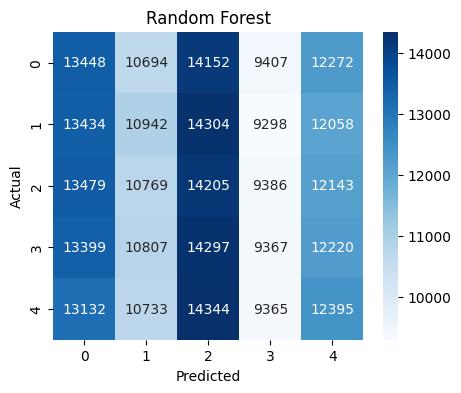

In [55]:
model_rf = RandomForestClassifier(
    n_estimators=200, 
    max_depth=10, 
    random_state=42, 
    class_weight='balanced'
)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

print("===== Random Forest =====")
print(classification_report(y_val, y_pred_rf))
plot_confusion_matrix(y_val, y_pred_rf, "Random Forest")

# 3️⃣ XGBoost

In [59]:
le_target = LabelEncoder()
y = le_target.fit_transform(y)

In [60]:
unique_classes = sorted(y_train.unique())
mapping = {old: new for new, old in enumerate(unique_classes)}

y_train = y_train.map(mapping)
y_val = y_val.map(mapping)
y_test = y_test.map(mapping)

===== XGBoost =====
              precision    recall  f1-score   support

           0       0.20      0.19      0.20     59973
           1       0.20      0.19      0.20     60036
           2       0.20      0.20      0.20     59982
           3       0.20      0.21      0.20     60090
           4       0.20      0.21      0.20     59969

    accuracy                           0.20    300050
   macro avg       0.20      0.20      0.20    300050
weighted avg       0.20      0.20      0.20    300050



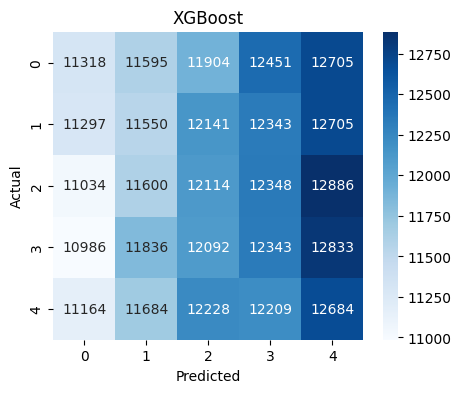

In [61]:
model_xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_val)

print("===== XGBoost =====")
print(classification_report(y_val, y_pred_xgb))
plot_confusion_matrix(y_val, y_pred_xgb, "XGBoost")

# 4️⃣ Deep Learning (Keras MLP)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1998 - loss: 7252.1777 - val_accuracy: 0.1999 - val_loss: 1.6095
Epoch 2/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2007 - loss: 2.7577 - val_accuracy: 0.2003 - val_loss: 1.6095
Epoch 3/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2004 - loss: 1.8865 - val_accuracy: 0.1999 - val_loss: 1.6095
Epoch 4/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2002 - loss: 1.7480 - val_accuracy: 0.2003 - val_loss: 1.6094
Epoch 5/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2003 - loss: 1.6648 - val_accuracy: 0.1999 - val_loss: 1.6094
Epoch 6/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1996 - loss: 1.6467 - val_accuracy: 0.1999 - val_loss: 1.6094
Epoch 7/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2000 - loss: 1.6795 - val_accuracy: 0.1999 - val_loss: 1.6094
Epoch 8/50
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2002 - loss: 1.6154

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


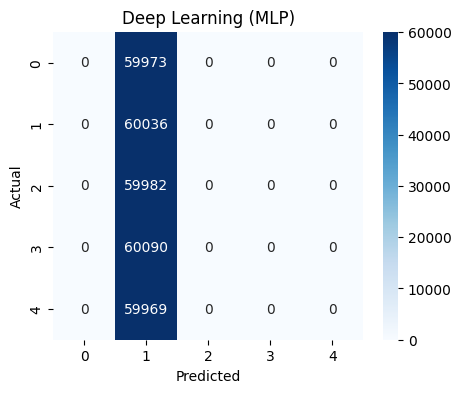

In [63]:
num_classes = len(np.unique(y))
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model_dl.fit(
    X_train, y_train_cat, 
    validation_data=(X_val, y_val_cat),
    epochs=50, batch_size=1000, callbacks=[early_stop], verbose=1
)

# Evaluation
y_pred_dl = np.argmax(model_dl.predict(X_val), axis=1)
print("===== Deep Learning (MLP) =====")
print(classification_report(y_val, y_pred_dl))
plot_confusion_matrix(y_val, y_pred_dl, "Deep Learning (MLP)")

# Build DNN Model

In [64]:
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [67]:
model_dnn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])


In [68]:
model_dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
early_stop = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

history_dnn = model_dnn.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=1200,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1999 - loss: 1.6095 - val_accuracy: 0.1996 - val_loss: 1.6094
Epoch 2/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2000 - loss: 1.6095 - val_accuracy: 0.1999 - val_loss: 1.6095
Epoch 3/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1996 - loss: 1.6095 - val_accuracy: 0.2003 - val_loss: 1.6094
Epoch 4/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1996 - loss: 1.6095 - val_accuracy: 0.1982 - val_loss: 1.6095
Epoch 5/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1992 - loss: 1.6095 - val_accuracy: 0.2005 - val_loss: 1.6094
Epoch 6/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1997 - loss: 1.6095 - val_accuracy: 0.2011 - val_loss: 1.6095
Epoch 7/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2003 - loss: 1.6095 - val_accuracy: 0.2001 - val_loss: 1.6094
Epoch 8/100
1167/1167 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2002 - loss: 

In [71]:
y_pred_dnn = np.argmax(model_dnn.predict(X_val), axis=1)
print("===== Deep Neural Network =====")
print(classification_report(y_val, y_pred_dnn))

9377/9377 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step
===== Deep Neural Network =====
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     59973
           1       0.20      0.12      0.15     60036
           2       0.00      0.00      0.00     59982
           3       0.20      0.88      0.33     60090
           4       0.00      0.00      0.00     59969

    accuracy                           0.20    300050
   macro avg       0.08      0.20      0.10    300050
weighted avg       0.08      0.20      0.10    300050



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


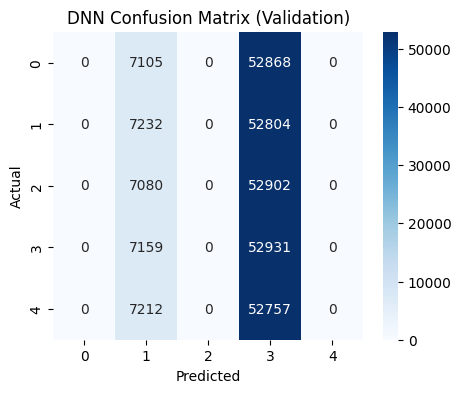

In [72]:
cm = confusion_matrix(y_val, y_pred_dnn)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("DNN Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

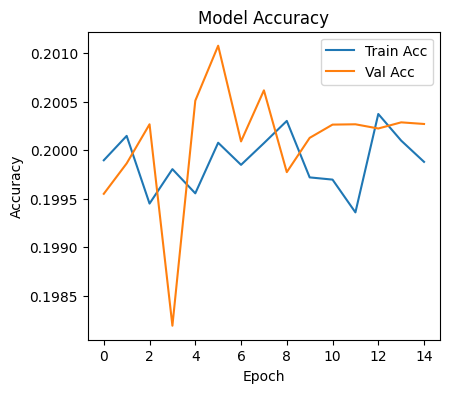

In [73]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_dnn.history['accuracy'], label='Train Acc')
plt.plot(history_dnn.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

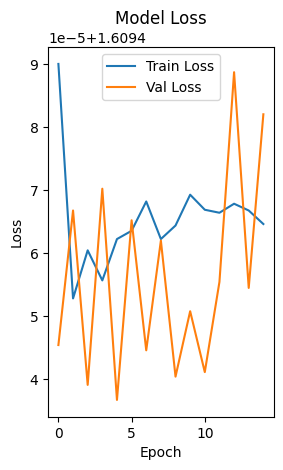

In [74]:
plt.subplot(1,2,2)
plt.plot(history_dnn.history['loss'], label='Train Loss')
plt.plot(history_dnn.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred_test_dnn = np.argmax(model_dnn.predict(X_test), axis=1)
print("===== DNN on Test Set =====")
print(classification_report(y_test, y_pred_test_dnn))

In [75]:
import joblib

# Save
joblib.dump(model_xgb, "xgb_employee_performance.pkl")

# Load
model_xgb_loaded = joblib.load("xgb_employee_performance.pkl")

# Predict again
y_pred_loaded = model_xgb_loaded.predict(X_val)